In [1]:
pip install scikit-learn pandas matplotlib graphviz

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import graphviz

In [5]:
df = pd.read_csv("/content/IRIS.csv")

In [6]:
print(df.to_string())

     sepal_length  sepal_width  petal_length  petal_width          species
0             5.1          3.5           1.4          0.2      Iris-setosa
1             4.9          3.0           1.4          0.2      Iris-setosa
2             4.7          3.2           1.3          0.2      Iris-setosa
3             4.6          3.1           1.5          0.2      Iris-setosa
4             5.0          3.6           1.4          0.2      Iris-setosa
5             5.4          3.9           1.7          0.4      Iris-setosa
6             4.6          3.4           1.4          0.3      Iris-setosa
7             5.0          3.4           1.5          0.2      Iris-setosa
8             4.4          2.9           1.4          0.2      Iris-setosa
9             4.9          3.1           1.5          0.1      Iris-setosa
10            5.4          3.7           1.5          0.2      Iris-setosa
11            4.8          3.4           1.6          0.2      Iris-setosa
12            4.8        

In [8]:
x = df.drop(columns=['species'])
y = df['species']

In [9]:
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [10]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [11]:
features=x.columns.tolist()
targets=y.unique().tolist()

In [12]:
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [13]:
targets

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.5, random_state=42)

In [16]:
x_train.all

<bound method DataFrame.all of      sepal_length  sepal_width  petal_length  petal_width
84            5.4          3.0           4.5          1.5
148           6.2          3.4           5.4          2.3
53            5.5          2.3           4.0          1.3
5             5.4          3.9           1.7          0.4
93            5.0          2.3           3.3          1.0
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[75 rows x 4 columns]>

In [17]:
y_train

,species
84,Iris-versicolor
148,Iris-virginica
53,Iris-versicolor
5,Iris-setosa
93,Iris-versicolor
...,...
71,Iris-versicolor
106,Iris-virginica
14,Iris-setosa
92,Iris-versicolor


In [18]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=targets))

Accuracy: 0.9066666666666666
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.83      0.87      0.85        23
 Iris-virginica       0.86      0.83      0.84        23

       accuracy                           0.91        75
      macro avg       0.90      0.90      0.90        75
   weighted avg       0.91      0.91      0.91        75



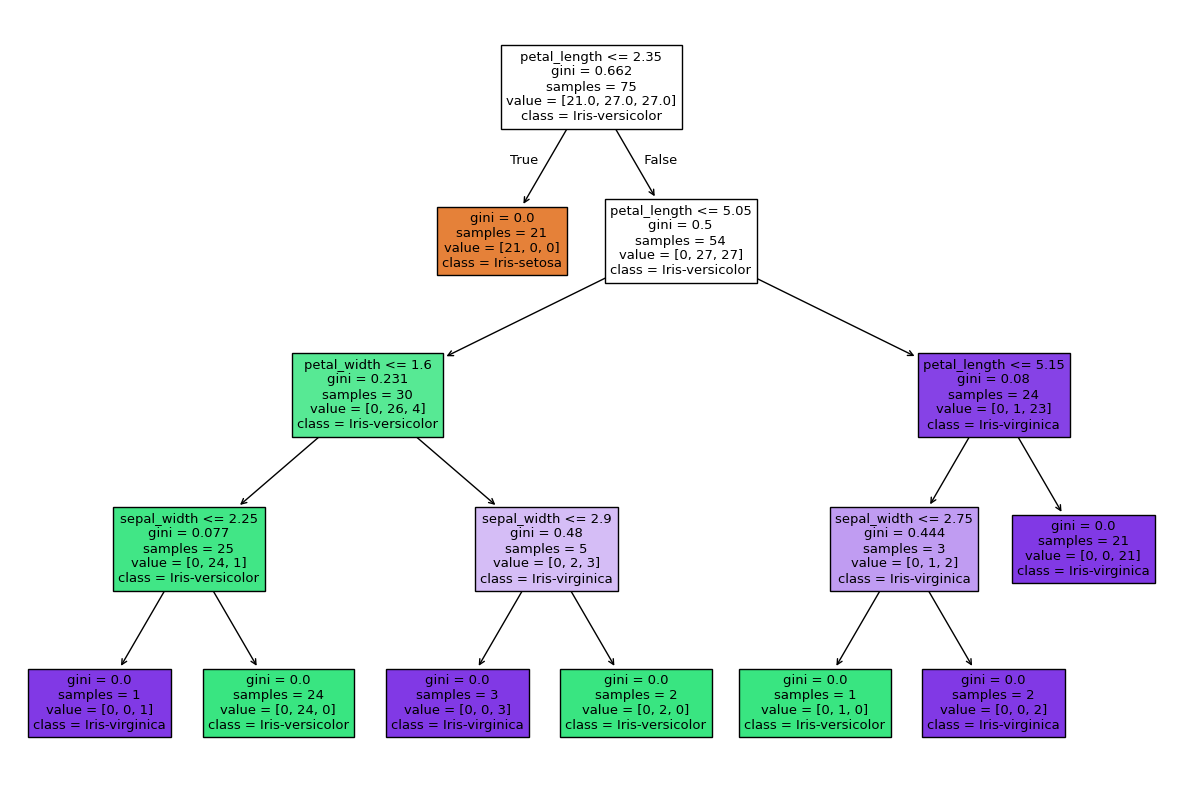

In [20]:
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=features, class_names=targets, filled=True)
plt.show()